In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm, skew
import plotly
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [5]:
data = pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [6]:
data.head()

Age Attrition  ... YearsSinceLastPromotion  YearsWithCurrManager
0   41       Yes  ...                       0                     5
1   49        No  ...                       1                     7
2   37       Yes  ...                       0                     0
3   33        No  ...                       3                     0
4   27        No  ...                       2                     2

[5 rows x 35 columns]

In [7]:
data.shape

(1470, 35)

In [8]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

# Univariate Analysis.

In [10]:
#grouping the columns by their data types.

data.columns.to_series().groupby(data.dtypes).groups

{int64: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'], object: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']}

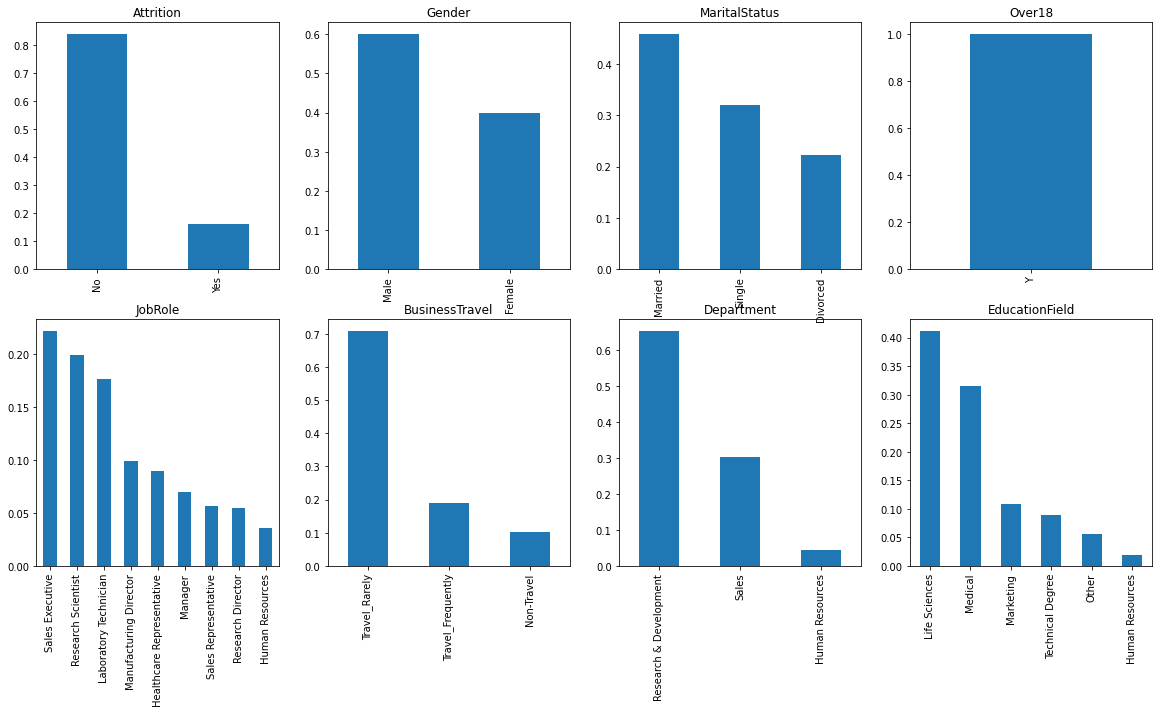

In [11]:
#Exploring categorical columns with object datatype.
categorical = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']
plt.subplot(2,4,1)
data.Attrition.value_counts(normalize=True).plot.bar(figsize=(20,10), title='Attrition')
plt.subplot(2,4,6)
data.BusinessTravel.value_counts(normalize=True).plot.bar(figsize=(20,10), title='BusinessTravel')
plt.subplot(2,4,7)
data.Department.value_counts(normalize=True).plot.bar(figsize=(20,10), title='Department')
plt.subplot(2,4,8)
data.EducationField.value_counts(normalize=True).plot.bar(figsize=(20,10), title='EducationField')
plt.subplot(2,4,2)
data.Gender.value_counts(normalize=True).plot.bar(figsize=(20,10), title='Gender')
plt.subplot(2,4,5)
data.JobRole.value_counts(normalize=True).plot.bar(figsize=(20,10), title='JobRole')
plt.subplot(2,4,3)
data.MaritalStatus.value_counts(normalize=True).plot.bar(figsize=(20,10), title='MaritalStatus')
plt.subplot(2,4,4)
data.Over18.value_counts(normalize=True).plot.bar(figsize=(20,10), title='Over18')

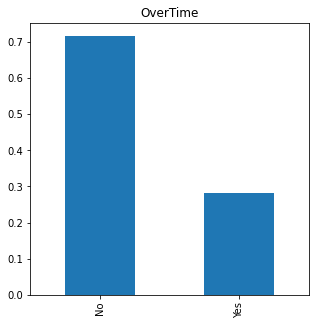

In [12]:
#Another categorical feature.
data.OverTime.value_counts(normalize=True).plot.bar(figsize=(5,5), title='OverTime')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2cd0489590>,
      dtype=object)

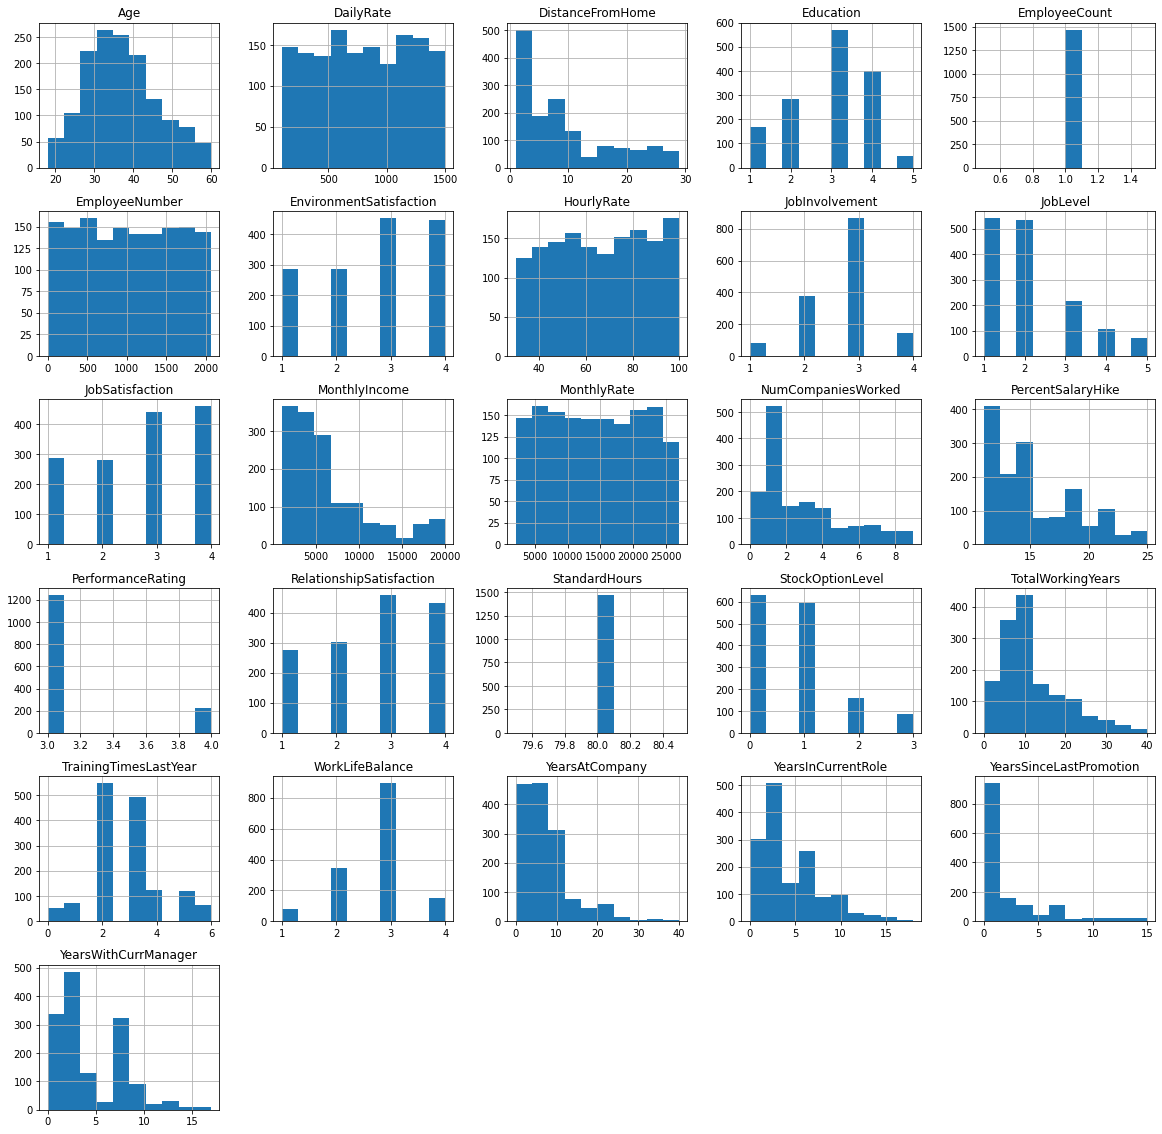

In [13]:
#Numerical columns values distribution.
data.hist(figsize=(20,20))

# Feature distribution with the target variable(Bivariate Analysis).

In [14]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

Text(0.5, 1.0, 'Age Distribution in Percentage by Attrition Status ')

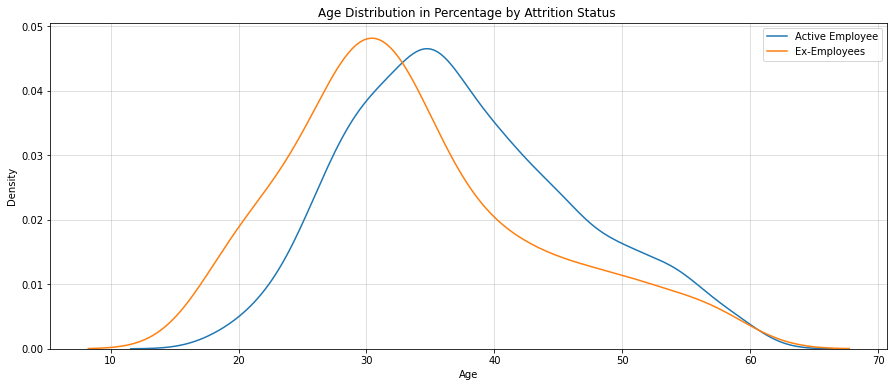

In [15]:
#Age
plt.figure(figsize=(15, 6))

plt.grid(True, alpha=0.5)
sns.kdeplot(data.loc[data['Attrition'] == 'No', 'Age'], label='Active Employee')
sns.kdeplot(data.loc[data['Attrition'] == 'Yes', 'Age'], label='Ex-Employees')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age Distribution in Percentage by Attrition Status ')

In [16]:
data.EducationField.value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [17]:
data.EducationField.unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [18]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [19]:
# making iplot graphs visible in Colab.
import cufflinks as cf
cf.set_config_file(offline=True)
import cufflinks
cufflinks.go_offline(connected=True)

import datetime
from datetime import date
import pandas as pd
import numpy as np
from plotly import __version__
%matplotlib inline

import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.offline import iplot

import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 


cf.go_offline()

def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
            },
          });
        </script>
        '''))
  
init_notebook_mode(connected=False)

In [62]:
#The EducationField of those who leave in percentage
df_EducationField = pd.DataFrame(columns=['Field', '% of Leavers'])
i=0
for field in list(data['EducationField'].unique()):
    ratio = data[(data['Attrition'] == 'Yes') & (data['EducationField'] == field)].shape[0] / data[data['EducationField']==field].shape[0]
    df_EducationField.loc[i] = (field, ratio*100)
    i+=1
df_EF = df_EducationField.groupby(by='Field').sum()

configure_plotly_browser_state()
df_EF.iplot(kind='bar', title= 'Leavers by Education Field (%)')
plt.show()

In [21]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [22]:
#Gender distribution on those who are leaving the company.
print('The Gender Distribution on those who are living from the company: Male = {:.1f}%  Female = {:.1f}%'
  .format(
      (data[(data['Attrition'] == 'Yes') & (data['Gender'] == 'Male')].shape[0]  / data[data['Gender'] == 'Male'].shape[0]) * 100 ,
      (data[(data['Attrition'] == 'Yes') & (data['Gender'] == 'Female')].shape[0] / data[data['Gender'] == 'Female'].shape[0])*100
  ))

The Gender Distribution on those who are living from the company: Male = 17.0%  Female = 14.8%


In [23]:
#Gender distribution on those who are leaving the company visualization.
df_Gender = pd.DataFrame(columns=['Gender', '% of Leavers'])
i=0
for gender in list(data['Gender'].unique()):
  ratio = data[(data['Attrition'] == 'Yes') & (data['Gender'] == gender)].shape[0] / data[data['Gender'] == gender].shape[0]
  df_Gender.loc[i] = (gender, ratio*100)
  i+=1

df_GENDER = df_Gender.groupby(by='Gender').sum()
configure_plotly_browser_state()
df_GENDER.iplot(kind='bar', title= 'Leavers by Gender (%)')
plt.show()

In [24]:
#Marital Status Distribution on those who are leaving.
df_MS = pd.DataFrame(columns=['Marital Status', '% of Leavers'])
for status in list(data.MaritalStatus.unique()):
  ratio = data[(data['Attrition'] == 'Yes') & (data['MaritalStatus'] == status)].shape[0] / data[data['MaritalStatus'] == status].shape[0]
  df_MS.loc[i] = (status, ratio*100)
  i+=1
df_Status = df_MS.groupby(by='Marital Status').sum()
configure_plotly_browser_state()
df_Status.iplot(kind='bar', title= 'Leavers by Marital Status (%)')
plt.show()

In [25]:
# DIstance From Home distribution to those who leave.
data.DistanceFromHome.value_counts().max()

211

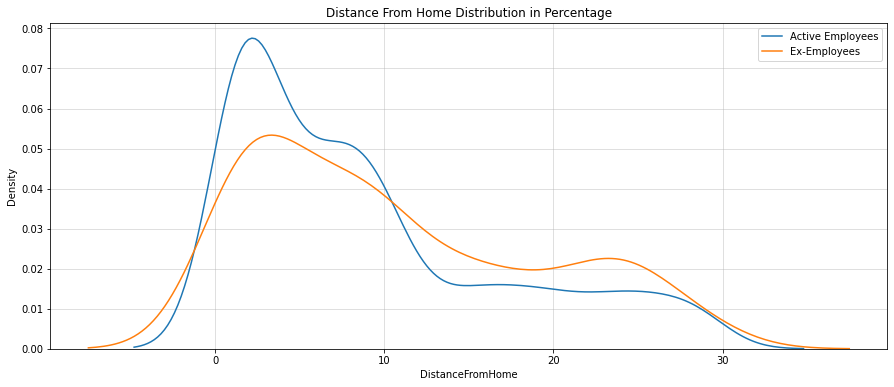

In [26]:
plt.figure(figsize=(15,6))
plt.grid(True, alpha=0.5)
sns.kdeplot(data.loc[data['Attrition'] == 'No', 'DistanceFromHome'], label= 'Active Employees')
sns.kdeplot(data.loc[data['Attrition'] == 'Yes', 'DistanceFromHome'], label='Ex-Employees')
plt.title('Distance From Home Distribution in Percentage')
plt.legend()
plt.show()

In [27]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [28]:
data.Department.value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [29]:
#Depertament distribution to those who leave.
df_Department = pd.DataFrame(columns=['Department', '% of Leavers'])
i=0
for department in list(data.Department.unique()):
  ratio = data[(data['Department'] == department) & (data['Attrition'] == 'Yes')].shape[0] / data[data['Department'] == department].shape[0]
  df_Department.loc[i] = (department, ratio*100)
  i+=1
df_Depart = df_Department.groupby(by='Department').sum()
configure_plotly_browser_state()
df_Depart.iplot(kind='bar', title= 'Leavers by Department (%)')
plt.show()

In [30]:
data.BusinessTravel.value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [31]:
# Business Travel Distribution to those who leave
df_Travel = pd.DataFrame(columns=['Business Travel', '% of Leavers'])
for travel in list(data.BusinessTravel.unique()):
  ratio = data[(data['Attrition'] == 'Yes') & (data['BusinessTravel'] == travel)].shape[0] / data[data['BusinessTravel'] == travel].shape[0]
  df_Travel.loc[i] = (travel, ratio*100)
  i+=1
df_Business = df_Travel.groupby(by='Business Travel').sum()
configure_plotly_browser_state()
df_Business.iplot(kind='bar', title= 'Leavers by Business Travel (%)')
plt.show()

In [32]:
data.JobRole.value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

In [33]:
#JobRole distribution to those who leave the company.
df_JRole = pd.DataFrame(columns=['Job Role', '% of Leavers'])
for role in list(data.JobRole.unique()):
  ratio = data[(data['Attrition'] == 'Yes') & (data['JobRole'] == role)].shape[0] / data[data['JobRole'] == role].shape[0]
  df_JRole.loc[i] = (role, ratio*100)
  i+=1
df_Job = df_JRole.groupby(by='Job Role').sum()
configure_plotly_browser_state()
df_Job.iplot(kind='bar', title= 'Leavers by Job Role (%)')
plt.show()

In [34]:
data.JobLevel.value_counts()

1    543
2    534
3    218
4    106
5     69
Name: JobLevel, dtype: int64

In [35]:
#JobRole distribution to those who leave the company.
df_JLevel = pd.DataFrame(columns=['Job Level', '% of Leavers'])
for level in list(data.JobLevel.unique()):
  ratio = data[(data['Attrition'] == 'Yes') & (data['JobLevel'] == level)].shape[0] / data[data['JobLevel'] == level].shape[0]
  df_JLevel.loc[i] = (level, ratio*100)
  i+=1
df_Level = df_JLevel.groupby(by='Job Level').sum()
configure_plotly_browser_state()
df_Level.iplot(kind='bar', title= 'Leavers by Job Role (%)')
plt.show()

In [36]:
data.JobInvolvement.value_counts()

3    868
2    375
4    144
1     83
Name: JobInvolvement, dtype: int64

In [37]:
#JobRole distribution to those who leave the company.
df_Job = pd.DataFrame(columns=['Job Involvement', '% of Leavers'])
for job in list(data.JobInvolvement.unique()):
  ratio = data[(data['Attrition'] == 'Yes') & (data['JobInvolvement'] == job)].shape[0] / data[data['JobInvolvement'] == job].shape[0]
  df_Job.loc[i] = (job, ratio*100)
  i+=1
df_job = df_Job.groupby(by='Job Involvement').sum()
configure_plotly_browser_state()
df_job.iplot(kind='bar', title= 'Leavers by Job Involvement (%)')
plt.show()

In [38]:
data.TrainingTimesLastYear.value_counts()

2    547
3    491
4    123
5    119
1     71
6     65
0     54
Name: TrainingTimesLastYear, dtype: int64

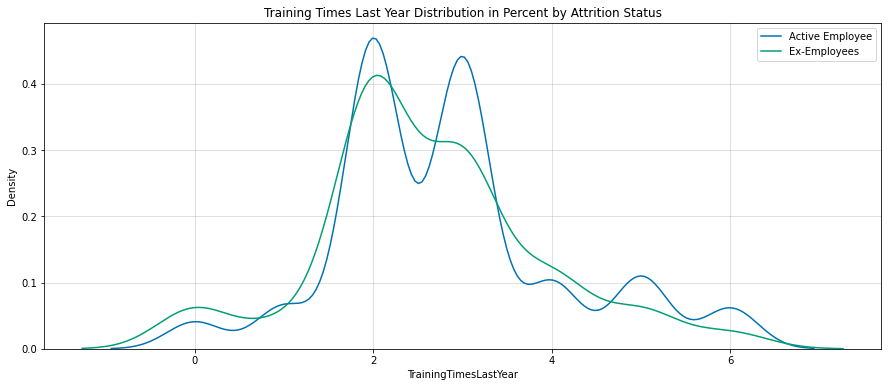

In [39]:
'''
    The data indicates that employees may have access to some Training. 
    A feature indicates how many years it's been since the employee attended such training.

'''
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(data.loc[data['Attrition'] == 'No', 'TrainingTimesLastYear'], label = 'Active Employee')
sns.kdeplot(data.loc[data['Attrition'] == 'Yes', 'TrainingTimesLastYear'], label = 'Ex-Employees')
plt.legend()
plt.xlabel('TrainingTimesLastYear')
plt.ylabel('Density')
plt.title('Training Times Last Year Distribution in Percent by Attrition Status');

In [40]:
data['NumCompaniesWorked'].value_counts()

1    521
0    197
3    159
2    146
4    139
7     74
6     70
5     63
9     52
8     49
Name: NumCompaniesWorked, dtype: int64

In [41]:
'''

  There is a feature for the number of companies the employee has worked at.
0 likely indicates that according to records, the employee has only worked at this company


'''

df_NumCompaniesWorked = pd.DataFrame(columns=["Num Companies Worked", "% of Leavers"])
i=0
for field in list(data['NumCompaniesWorked'].unique()):
    ratio = data[(data['NumCompaniesWorked']==field)&(data['Attrition']=="Yes")].shape[0] / data[data['NumCompaniesWorked']==field].shape[0]
    df_NumCompaniesWorked.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_NC = df_NumCompaniesWorked.groupby(by="Num Companies Worked").sum()
configure_plotly_browser_state()
df_NC.iplot(kind='bar',title='Leavers by Num Companies Worked (%)')
plt.show()

In [42]:
data.YearsAtCompany.value_counts()

5     196
1     171
3     128
2     127
10    120
4     110
7      90
9      82
8      80
6      76
0      44
11     32
20     27
13     24
15     20
14     18
22     15
12     14
21     14
18     13
16     12
19     11
17      9
24      6
33      5
25      4
26      4
31      3
32      3
36      2
27      2
29      2
23      2
30      1
34      1
37      1
40      1
Name: YearsAtCompany, dtype: int64

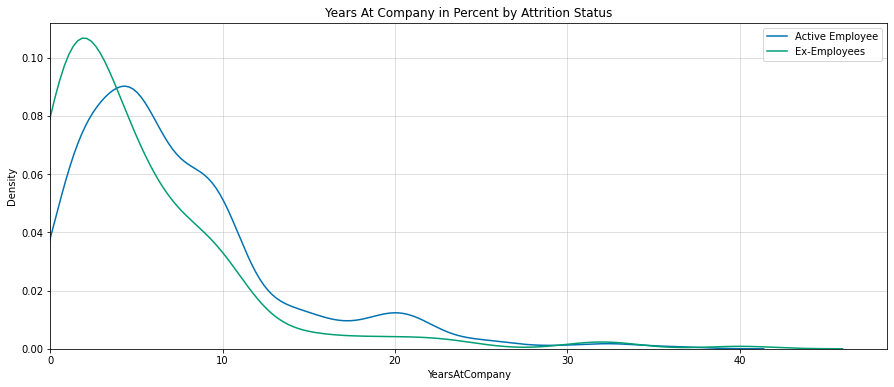

In [43]:
#Years working at the company distribution to those who leave.
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(data.loc[data['Attrition'] == 'No', 'YearsAtCompany'], label = 'Active Employee')
sns.kdeplot(data.loc[data['Attrition'] == 'Yes', 'YearsAtCompany'], label = 'Ex-Employees')
plt.xlabel('YearsAtCompany')
plt.xlim(left=0)
plt.ylabel('Density')
plt.title('Years At Company in Percent by Attrition Status');
plt.legend()

In [44]:
data.YearsInCurrentRole.value_counts()

2     372
0     244
7     222
3     135
4     104
8      89
9      67
1      57
6      37
5      36
10     29
11     22
13     14
14     11
12     10
15      8
16      7
17      4
18      2
Name: YearsInCurrentRole, dtype: int64

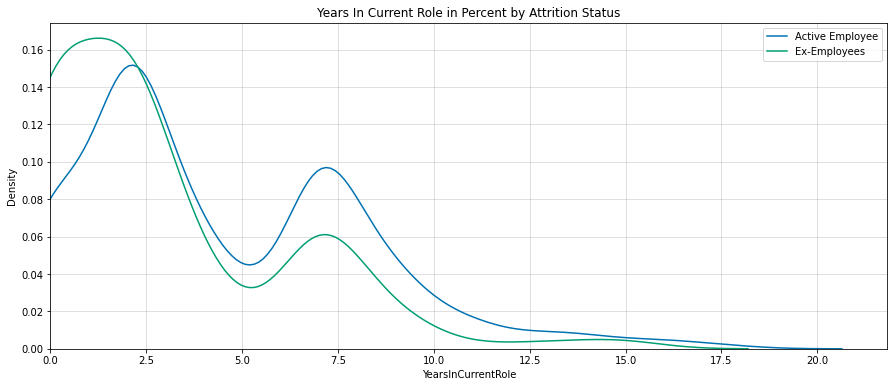

In [45]:
#Years working at the current role distributio to those wh leave.
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(data.loc[data['Attrition'] == 'No', 'YearsInCurrentRole'], label = 'Active Employee')
sns.kdeplot(data.loc[data['Attrition'] == 'Yes', 'YearsInCurrentRole'], label = 'Ex-Employees')
plt.xlabel('YearsInCurrentRole')
plt.xlim(left=0)
plt.ylabel('Density')
plt.title('Years In Current Role in Percent by Attrition Status');
plt.legend()

In [46]:
data.YearsSinceLastPromotion.value_counts()

0     581
1     357
2     159
7      76
4      61
3      52
5      45
6      32
11     24
8      18
9      17
15     13
13     10
12     10
14      9
10      6
Name: YearsSinceLastPromotion, dtype: int64

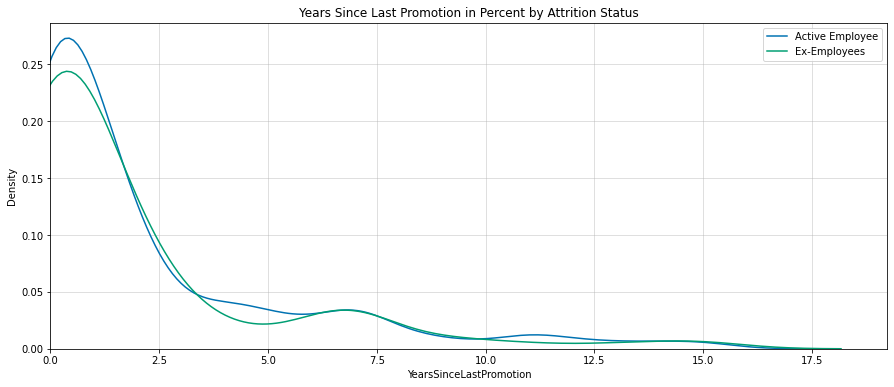

In [47]:
#Years since last promotion
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(data.loc[data['Attrition'] == 'No', 'YearsSinceLastPromotion'], label = 'Active Employee')
sns.kdeplot(data.loc[data['Attrition'] == 'Yes', 'YearsSinceLastPromotion'], label = 'Ex-Employees')
plt.xlabel('YearsSinceLastPromotion')
plt.xlim(left=0)
plt.ylabel('Density')
plt.title('Years Since Last Promotion in Percent by Attrition Status');
plt.legend()

In [48]:
data.TotalWorkingYears.value_counts()

10    202
6     125
8     103
9      96
5      88
1      81
7      81
4      63
12     48
3      42
15     40
16     37
13     36
11     36
21     34
17     33
14     31
2      31
20     30
18     27
19     22
23     22
22     21
24     18
25     14
28     14
26     14
0      11
29     10
31      9
32      9
27      7
30      7
33      7
36      6
34      5
37      4
35      3
40      2
38      1
Name: TotalWorkingYears, dtype: int64

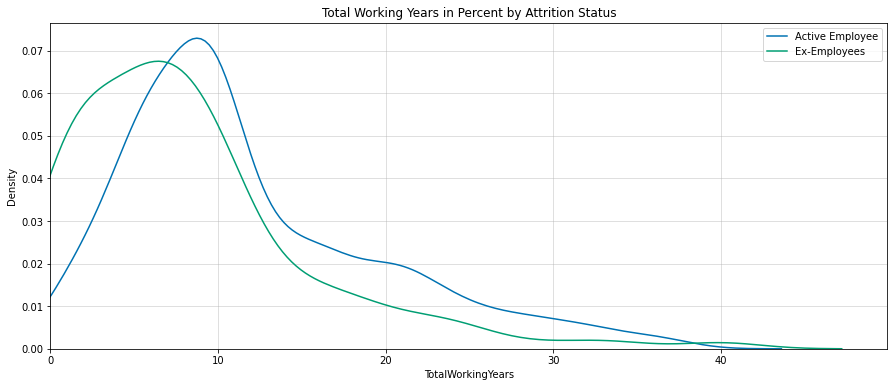

In [49]:
#Working years distribution
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(data.loc[data['Attrition'] == 'No', 'TotalWorkingYears'], label = 'Active Employee')
sns.kdeplot(data.loc[data['Attrition'] == 'Yes', 'TotalWorkingYears'], label = 'Ex-Employees')
plt.xlabel('TotalWorkingYears')
plt.xlim(left=0)
plt.ylabel('Density')
plt.title('Total Working Years in Percent by Attrition Status');
plt.legend()

In [50]:
data.YearsWithCurrManager.value_counts()

2     344
0     263
7     216
3     142
8     107
4      98
1      76
9      64
5      31
6      29
10     27
11     22
12     18
13     14
17      7
14      5
15      5
16      2
Name: YearsWithCurrManager, dtype: int64

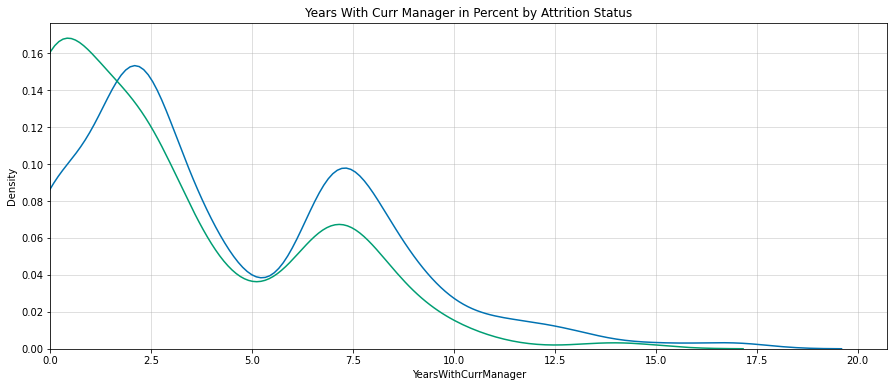

In [51]:
#Years with Current manager distribution 
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(data.loc[data['Attrition'] == 'No', 'YearsWithCurrManager'], label = 'Active Employee')
sns.kdeplot(data.loc[data['Attrition'] == 'Yes', 'YearsWithCurrManager'], label = 'Ex-Employees')
plt.xlabel('YearsWithCurrManager')
plt.xlim(left=0)
plt.ylabel('Density')
plt.title('Years With Curr Manager in Percent by Attrition Status');

In [52]:
#WorkLife balance distribution with those who left.
data.WorkLifeBalance.value_counts()

3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64

In [56]:
'''Work-Life Balance Score
A feature related to "Work-Life Balance" was captured as: 1 'Bad' 2 'Good' 3 'Better' 4 'Best'. 
The data indicates that the largest normalised proportion of Leavers had "Bad" Work-Life Balance.
'''

df_WorkLifeBalance = pd.DataFrame(columns=["WorkLifeBalance", "% of Leavers"])
i=0
for field in list(data['WorkLifeBalance'].unique()):
    ratio = data[(data['WorkLifeBalance']==field)&(data['Attrition']=="Yes")].shape[0] / data[data['WorkLifeBalance']==field].shape[0]
    df_WorkLifeBalance.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_WLB = df_WorkLifeBalance.groupby(by="WorkLifeBalance").sum()
configure_plotly_browser_state()
df_WLB.iplot(kind='bar',title='Leavers by WorkLifeBalance (%)')
plt.show()

In [57]:
data.StandardHours.value_counts()

80    1470
Name: StandardHours, dtype: int64

In [58]:
data.OverTime.value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

In [61]:
#OverTime distribution to the employees who are leaving in percentage.
df_OverTime = pd.DataFrame(columns=["OverTime", "% of Leavers"])
i=0
for field in list(data['OverTime'].unique()):
    ratio = data[(data['OverTime']==field)&(data['Attrition']=="Yes")].shape[0] / data[data['OverTime']==field].shape[0]
    df_OverTime.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_OT = df_OverTime.groupby(by="OverTime").sum()
configure_plotly_browser_state()
df_OT.iplot(kind='bar',title='Leavers by OverTime (%)')
plt.show()

In [68]:
print('Employee Hourly Rate varies from ${} to ${}.'.format(data.HourlyRate.min(), data.HourlyRate.max()))

Employee Hourly Rate varies from $30 to $100.


In [69]:
print("Employee Daily Rate varies from ${} to ${}.".format(
    data['DailyRate'].min(), data['DailyRate'].max()))

Employee Daily Rate varies from $102 to $1499.


In [70]:
print("Employee Monthly Rate varies from ${} to ${}.".format(
    data['MonthlyRate'].min(), data['MonthlyRate'].max()))

Employee Monthly Rate varies from $2094 to $26999.


In [71]:
print("Employee Monthly Income varies from ${} to ${}.".format(
    data['MonthlyIncome'].min(), data['MonthlyIncome'].max()))

Employee Monthly Income varies from $1009 to $19999.


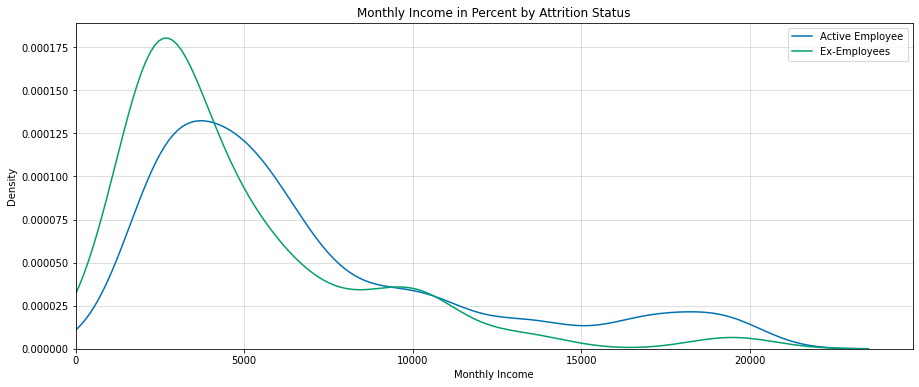

In [64]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(data.loc[data['Attrition'] == 'No', 'MonthlyIncome'], label = 'Active Employee')
sns.kdeplot(data.loc[data['Attrition'] == 'Yes', 'MonthlyIncome'], label = 'Ex-Employees')
plt.legend()
plt.xlabel('Monthly Income')
plt.xlim(left=0)
plt.ylabel('Density')
plt.title('Monthly Income in Percent by Attrition Status');

In [73]:
print("Percentage Salary Hikes varies from {}% to {}%.".format(
    data['PercentSalaryHike'].min(), data['PercentSalaryHike'].max()))

Percentage Salary Hikes varies from 11% to 25%.


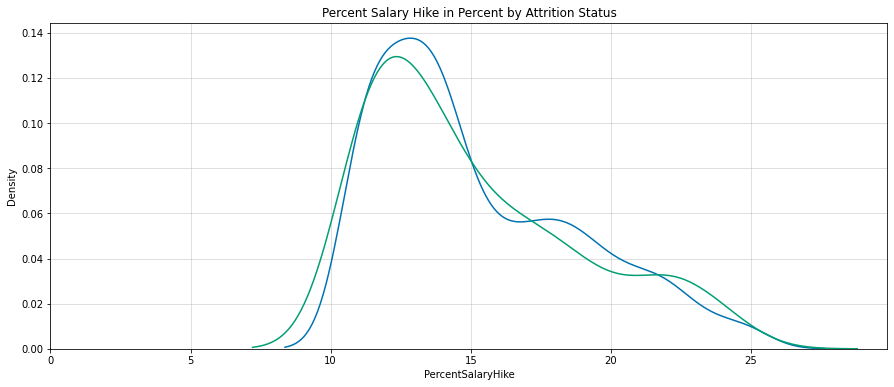

In [74]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(data.loc[data['Attrition'] == 'No', 'PercentSalaryHike'], label = 'Active Employee')
sns.kdeplot(data.loc[data['Attrition'] == 'Yes', 'PercentSalaryHike'], label = 'Ex-Employees')
plt.xlabel('PercentSalaryHike')
plt.xlim(left=0)
plt.ylabel('Density')
plt.title('Percent Salary Hike in Percent by Attrition Status');

In [76]:
data.StockOptionLevel.value_counts()

0    631
1    596
2    158
3     85
Name: StockOptionLevel, dtype: int64

In [75]:
print("Stock Option Levels varies from {} to {}.".format(
    data['StockOptionLevel'].min(), data['StockOptionLevel'].max()))

Stock Option Levels varies from 0 to 3.


In [77]:
print("Normalised percentage of leavers by Stock Option Level: 0: {:.2f}, Level: 1: {:.2f}%, 2: {:.2f}%, 3: {:.2f}%".format(
    data[(data['Attrition'] == 'Yes') & (data['StockOptionLevel'] == 0)
          ].shape[0] / data[data['StockOptionLevel'] == 1].shape[0]*100,
    data[(data['Attrition'] == 'Yes') & (data['StockOptionLevel'] == 1)
          ].shape[0] / data[data['StockOptionLevel'] == 1].shape[0]*100,
    data[(data['Attrition'] == 'Yes') & (data['StockOptionLevel'] == 2)
          ].shape[0] / data[data['StockOptionLevel'] == 1].shape[0]*100,
    data[(data['Attrition'] == 'Yes') & (data['StockOptionLevel'] == 3)].shape[0] / data[data['StockOptionLevel'] == 1].shape[0]*100))

Normalised percentage of leavers by Stock Option Level: 0: 25.84, Level: 1: 9.40%, 2: 2.01%, 3: 2.52%


In [78]:
df_StockOptionLevel = pd.DataFrame(columns=["StockOptionLevel", "% of Leavers"])
i=0
for field in list(data['StockOptionLevel'].unique()):
    ratio = data[(data['StockOptionLevel']==field)&(data['Attrition']=="Yes")].shape[0] / data[data['StockOptionLevel']==field].shape[0]
    df_StockOptionLevel.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_SOL = df_StockOptionLevel.groupby(by="StockOptionLevel").sum()
configure_plotly_browser_state()
df_SOL.iplot(kind='bar',title='Leavers by Stock Option Level (%)')
plt.show()

In [79]:
'''Employee Satisfaction and Performance Information
Environment Satisfaction was captured as: 1 'Low' 2 'Medium' 3 'High' 4 'Very High'.
Proportion of Leaving Employees decreases as the Environment Satisfaction score increases.'''
data.EnvironmentSatisfaction.value_counts()

3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64

In [81]:
df_EnvironmentSatisfaction = pd.DataFrame(columns=["EnvironmentSatisfaction", "% of Leavers"])
i=0
for field in list(data['EnvironmentSatisfaction'].unique()):
    ratio = data[(data['EnvironmentSatisfaction']==field)&(data['Attrition']=="Yes")].shape[0] / data[data['EnvironmentSatisfaction']==field].shape[0]
    df_EnvironmentSatisfaction.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_Env = df_EnvironmentSatisfaction.groupby(by="EnvironmentSatisfaction").sum()
configure_plotly_browser_state()
df_Env.iplot(kind='bar',title='Leavers by Environment Satisfaction (%)')

In [83]:
'''Job Satisfaction was captured as: 1 'Low' 2 'Medium' 3 'High' 4 'Very High'.
Proportion of Leaving Employees decreases as the Job Satisfaction score increases.'''
data.JobSatisfaction.value_counts()

4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64

In [85]:
df_JobSatisfaction = pd.DataFrame(columns=["JobSatisfaction", "% of Leavers"])
i=0
for field in list(data['JobSatisfaction'].unique()):
    ratio = data[(data['JobSatisfaction']==field)&(data['Attrition']=="Yes")].shape[0] / data[data['JobSatisfaction']==field].shape[0]
    df_JobSatisfaction.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_JS = df_JobSatisfaction.groupby(by="JobSatisfaction").sum()
configure_plotly_browser_state()
df_JS.iplot(kind='bar',title='Leavers by Job Satisfaction (%)')

In [86]:
'''Relationship Satisfaction was captured as: 1 'Low', 2 'Medium', 3 'High', 4 'Very High'.'''
data.RelationshipSatisfaction.value_counts()

3    459
4    432
2    303
1    276
Name: RelationshipSatisfaction, dtype: int64

In [87]:
df_RelationshipSatisfaction = pd.DataFrame(columns=["RelationshipSatisfaction", "% of Leavers"])
i=0
for field in list(data['RelationshipSatisfaction'].unique()):
    ratio = data[(data['RelationshipSatisfaction']==field)&(data['Attrition']=="Yes")].shape[0] / data[data['RelationshipSatisfaction']==field].shape[0]
    df_RelationshipSatisfaction.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_RS = df_RelationshipSatisfaction.groupby(by="RelationshipSatisfaction").sum()
configure_plotly_browser_state()
df_RS.iplot(kind='bar',title='Leavers by Relationship Satisfaction (%)')

In [90]:
'''Employee Performance Rating was captured as: 1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding'''
data.PerformanceRating.value_counts()

3    1244
4     226
Name: PerformanceRating, dtype: int64

In [91]:
print("Normalised percentage of leavers by Stock Option Level: 3: {:.2f}%, 4: {:.2f}%".format(
    data[(data['Attrition'] == 'Yes') & (data['PerformanceRating'] == 3)
          ].shape[0] / data[data['StockOptionLevel'] == 1].shape[0]*100,
    data[(data['Attrition'] == 'Yes') & (data['PerformanceRating'] == 4)].shape[0] / data[data['StockOptionLevel'] == 1].shape[0]*100))

Normalised percentage of leavers by Stock Option Level: 3: 33.56%, 4: 6.21%


In [92]:
df_PerformanceRating = pd.DataFrame(columns=["PerformanceRating", "% of Leavers"])
i=0
for field in list(data['PerformanceRating'].unique()):
    ratio = data[(data['PerformanceRating']==field)&(data['Attrition']=="Yes")].shape[0] / data[data['PerformanceRating']==field].shape[0]
    df_PerformanceRating.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_PR = df_PerformanceRating.groupby(by="PerformanceRating").sum()
configure_plotly_browser_state()
df_PR.iplot(kind='bar',title='Leavers by Performance Rating (%)')

In [94]:
'''Target Variable: Attrition
The feature 'Attrition' is what this Machine Learning problem is about. 
We are trying to predict the value of the feature 'Attrition' 
by using other related features associated with the employee's personal and professional history.'''
data.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [95]:
print("Percentage of Current Employees is {:.1f}% and of Ex-employees is: {:.1f}%".format(
    data[data['Attrition'] == 'No'].shape[0] / data.shape[0]*100,
    data[data['Attrition'] == 'Yes'].shape[0] / data.shape[0]*100))

Percentage of Current Employees is 83.9% and of Ex-employees is: 16.1%


In [97]:
'''As shown on the chart above, we see this is an imbalanced class problem. Indeed, 
the percentage of Current Employees in our dataset is 83.9% and the percentage of Ex-employees is: 16.1%
Machine learning algorithms typically work best when the number of instances of each classes are roughly equal. 
We will have to address this target feature imbalance prior to implementing our Machine Learning algorithms.'''
configure_plotly_browser_state()
data['Attrition'].iplot(kind='hist', xTitle='Attrition',
                         yTitle='count', title='Attrition Distribution')

In [101]:
'''Correlation
Let's take a look at some of most significant correlations. 
It is worth remembering that correlation coefficients only measure linear correlations.'''

#Find Correlation with the target and sort.
data_transform = data.copy()
data_transform['Target'] = data_transform['Attrition'].apply(lambda x: 1 if x=='Yes' else 0)
data_transform = data_transform.drop(['Attrition', 'EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18'], axis=1)
correlation = data_transform.corr()['Target'].sort_values()

print('Most Positive Correlation: \n', correlation.tail())
print('Most Negative Correlation: \n', correlation.head())

Most Positive Correlation: 
 PerformanceRating     0.002889
MonthlyRate           0.015170
NumCompaniesWorked    0.043494
DistanceFromHome      0.077924
Target                1.000000
Name: Target, dtype: float64
Most Negative Correlation: 
 TotalWorkingYears    -0.171063
JobLevel             -0.169105
YearsInCurrentRole   -0.160545
MonthlyIncome        -0.159840
Age                  -0.159205
Name: Target, dtype: float64


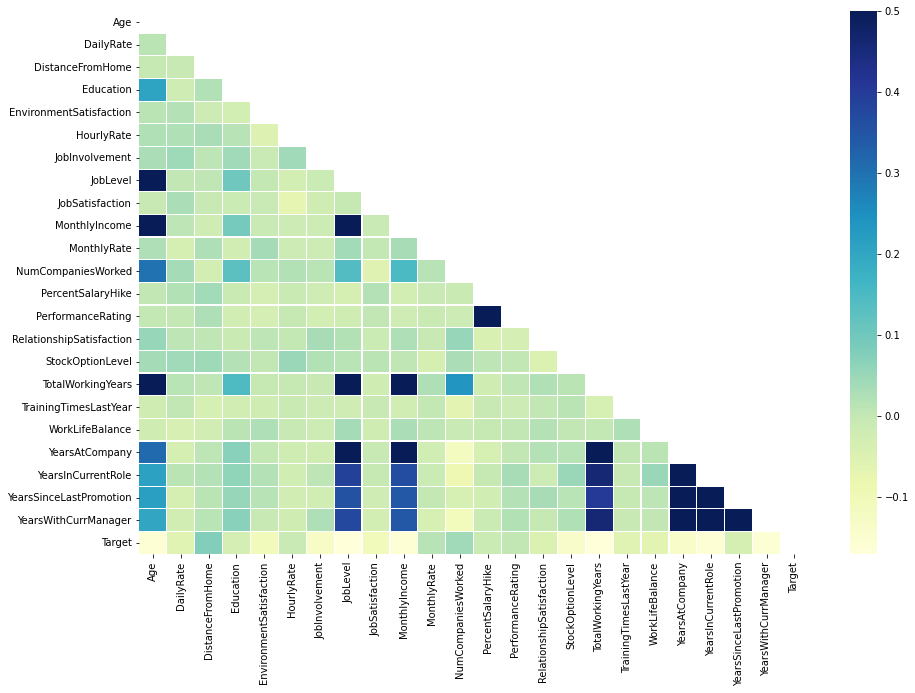

In [105]:
'''Let's plot a heatmap to visualize the correlation between Attrition and these factors.'''
corr = data_transform.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(15, 10))
sns.heatmap(corr,
            vmax=.5,
            mask=mask,
            # annot=True, fmt='.2f',
            linewidths=.2, cmap="YlGnBu")

In [ ]:
'''As shown above, "Monthly Rate", "Number of Companies Worked" and "Distance From Home" are positively correlated to Attrition;
while "Total Working Years", "Job Level", and "Years In Current Role" are negatively correlated to Attrition.'''

### EDA Concluding Remarks

Let's summarise the findings from this EDA: <br>

> - The dataset does not feature any missing or erroneous data values, and all features are of the correct data type. <br>
- The strongest positive correlations with the target features are: **Performance Rating**, **Monthly Rate**, **Num Companies Worked**, **Distance From Home**. 
- The strongest negative correlations with the target features are: **Total Working Years**, **Job Level**, **Years In Current Role**, and **Monthly Income**.
- The dataset is **imbalanced** with the majoriy of observations describing Currently Active Employees. <br>
- Several features (ie columns) are redundant for our analysis, namely: EmployeeCount, EmployeeNumber, StandardHours, and Over18. <br>

Other observations include: <br>
> - Single employees show the largest proportion of leavers, compared to Married and Divorced counterparts. <br>
- About 10% of leavers left when they reach their 2-year anniversary at the company. <br>
- Loyal employees with higher salaries and more responsbilities show lower proportion of leavers compared to their counterparts. <br>
- People who live further away from their work show higher proportion of leavers compared to their counterparts.<br>
- People who travel frequently show higher proportion of leavers compared to their counterparts.<br>
- People who have to work overtime show higher proportion of leavers compared to their counterparts.<br>
- Employee who work as Sales Representatives show a significant percentage of Leavers in the submitted dataset.<br>
- Employees that have already worked at several companies previously (already "bounced" between workplaces) show higher proportion of leavers compared to their counterparts.<br>

<iframe src="https://www.kaggle.com/embed/hamzaben/employee-churn-model-w-strategic-retention-plan/notebook?cellIds=141&kernelSessionId=11444868" height="300" style="margin: 0 auto; width: 100%; max-width: 950px;" frameborder="0" scrolling="auto" title="Employee Churn Model w/ Strategic Retention Plan"></iframe>